### Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income:- As discussed
during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan
approval might also be high.
* EMI:- EMI is the monthly amount to
be paid by the applicant to repay the loan. The idea behind making this
variable is that people who have high EMI’s might find it difficult to
pay back the loan. We can calculate the EMI by taking the ratio of loan
amount with respect to loan amount term.
* Balance Income:- This
is the income left after the EMI has been paid. The idea behind creating
this variable is that if this value is high, the chances are high that a
person will repay the loan and hence increasing the chances of loan
approval.

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_FE1.csv") 
test=pd.read_csv("test_FE1.csv")
#train=train.drop('Loan_ID',axis=1) 
#test=test.drop('Loan_ID',axis=1)

### Total_Income feature

In [3]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Text(0, 0.5, 'Percentage')

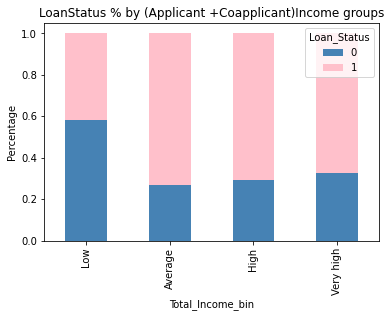

In [4]:
# lets once recheck how output is effected wrt total_Income
#train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
grp = train.groupby(by = ["Total_Income_bin","Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by (Applicant +Coapplicant)Income groups' )
plt.ylabel("Percentage")

### Observation :
* when the total is low there is low chances of loan approval
so this feature is effecting so can be used

skewness  5.633448514884535


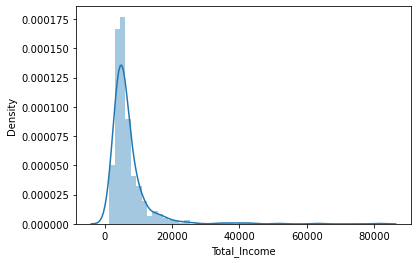

In [5]:
#Let’s check the distribution of Total Income.
sns.distplot(train['Total_Income'])
print("skewness ",train['Total_Income'].skew())

## observation :
We can see it is shifted towards the left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.


skewness  1.0767023443049968


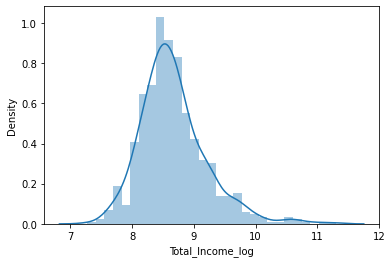

In [6]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])
print("skewness " ,train['Total_Income_log'].skew())

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. 

### emi feature

In [7]:
#  Let’s create the EMI feature now.
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Text(0, 0.5, 'Percentage')

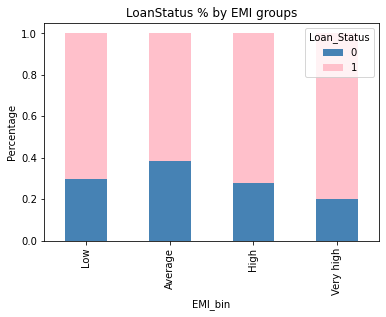

In [8]:
# lets once recheck how output is effected wrt EMI
#train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
bins=[0,0.5,1,2.5,9.25]
group=['Low','Average','High', 'Very high'] 
train['EMI_bin']=pd.cut(train['EMI'],bins,labels=group)
grp = train.groupby(by = ['EMI_bin',"Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by EMI groups' )
plt.ylabel("Percentage")

 ## Observation:
 this plot is not inline with our hypothesis
 Hypothesis - EMI -Lesser the amount to be paid monthly, the higher the chances of getting approval.

9.9607008985074


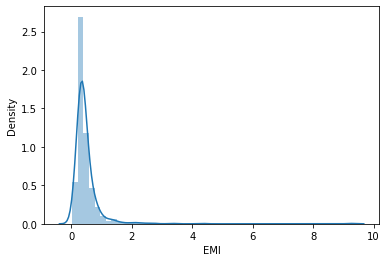

In [9]:
sns.distplot(train['EMI'])
print(train["EMI"].skew())


## Balance Income Feature

In [10]:
# Lets create BalnceIncome Feature
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)

In [11]:
train['Balance_Income'].min()

-1768.0

In [12]:
80000  -1768

78232

Text(0, 0.5, 'Percentage')

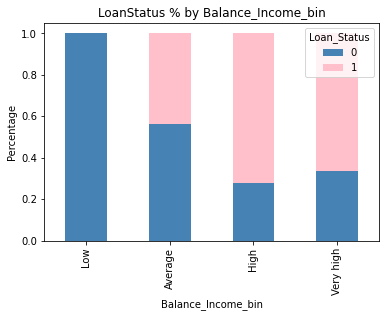

In [13]:
# lets once recheck how output is effected wrt EMI
#train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
bins=[-1768,0,2500,6000,80000]
group=['Low','Average','High', 'Very high'] 
train['Balance_Income_bin']=pd.cut(train['Balance_Income'],bins,labels=group)
grp = train.groupby(by = ['Balance_Income_bin',"Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by Balance_Income_bin' )
plt.ylabel("Percentage")

### Observation : 
1. if balance income <0 .. loan will not be approved ---its obvious becs u will not be able to pay the emi..becs emi  >income

5.713583929649979


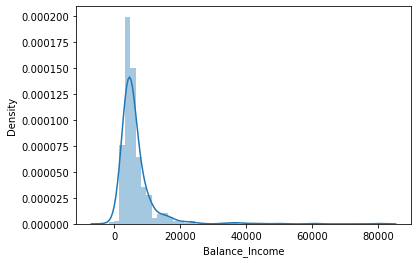

In [14]:
sns.distplot(train['Balance_Income'])
print(train['Balance_Income'].skew())


Let us now drop the variables which we used to create these new features. The reason for doing this is, that the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [15]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)

In [16]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)

In [19]:
# lets drop the bins created as well --we created only for visualisation
train=train.drop(['Balance_Income_bin','EMI_bin','Total_Income_bin'], axis=1)

In [20]:
train.to_csv("train_FE2.csv",index = False)

In [18]:
test.to_csv("test_FE2.csv",index = False)

<AxesSubplot:xlabel='Total_Income', ylabel='LoanAmount_log'>

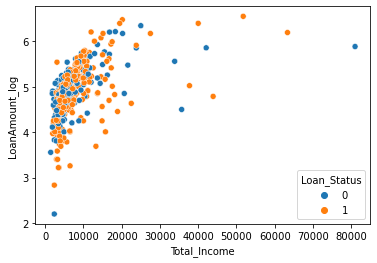

In [26]:
sns.scatterplot(x = train["Total_Income"] , y=train["LoanAmount_log"],hue = train["Loan_Status"])

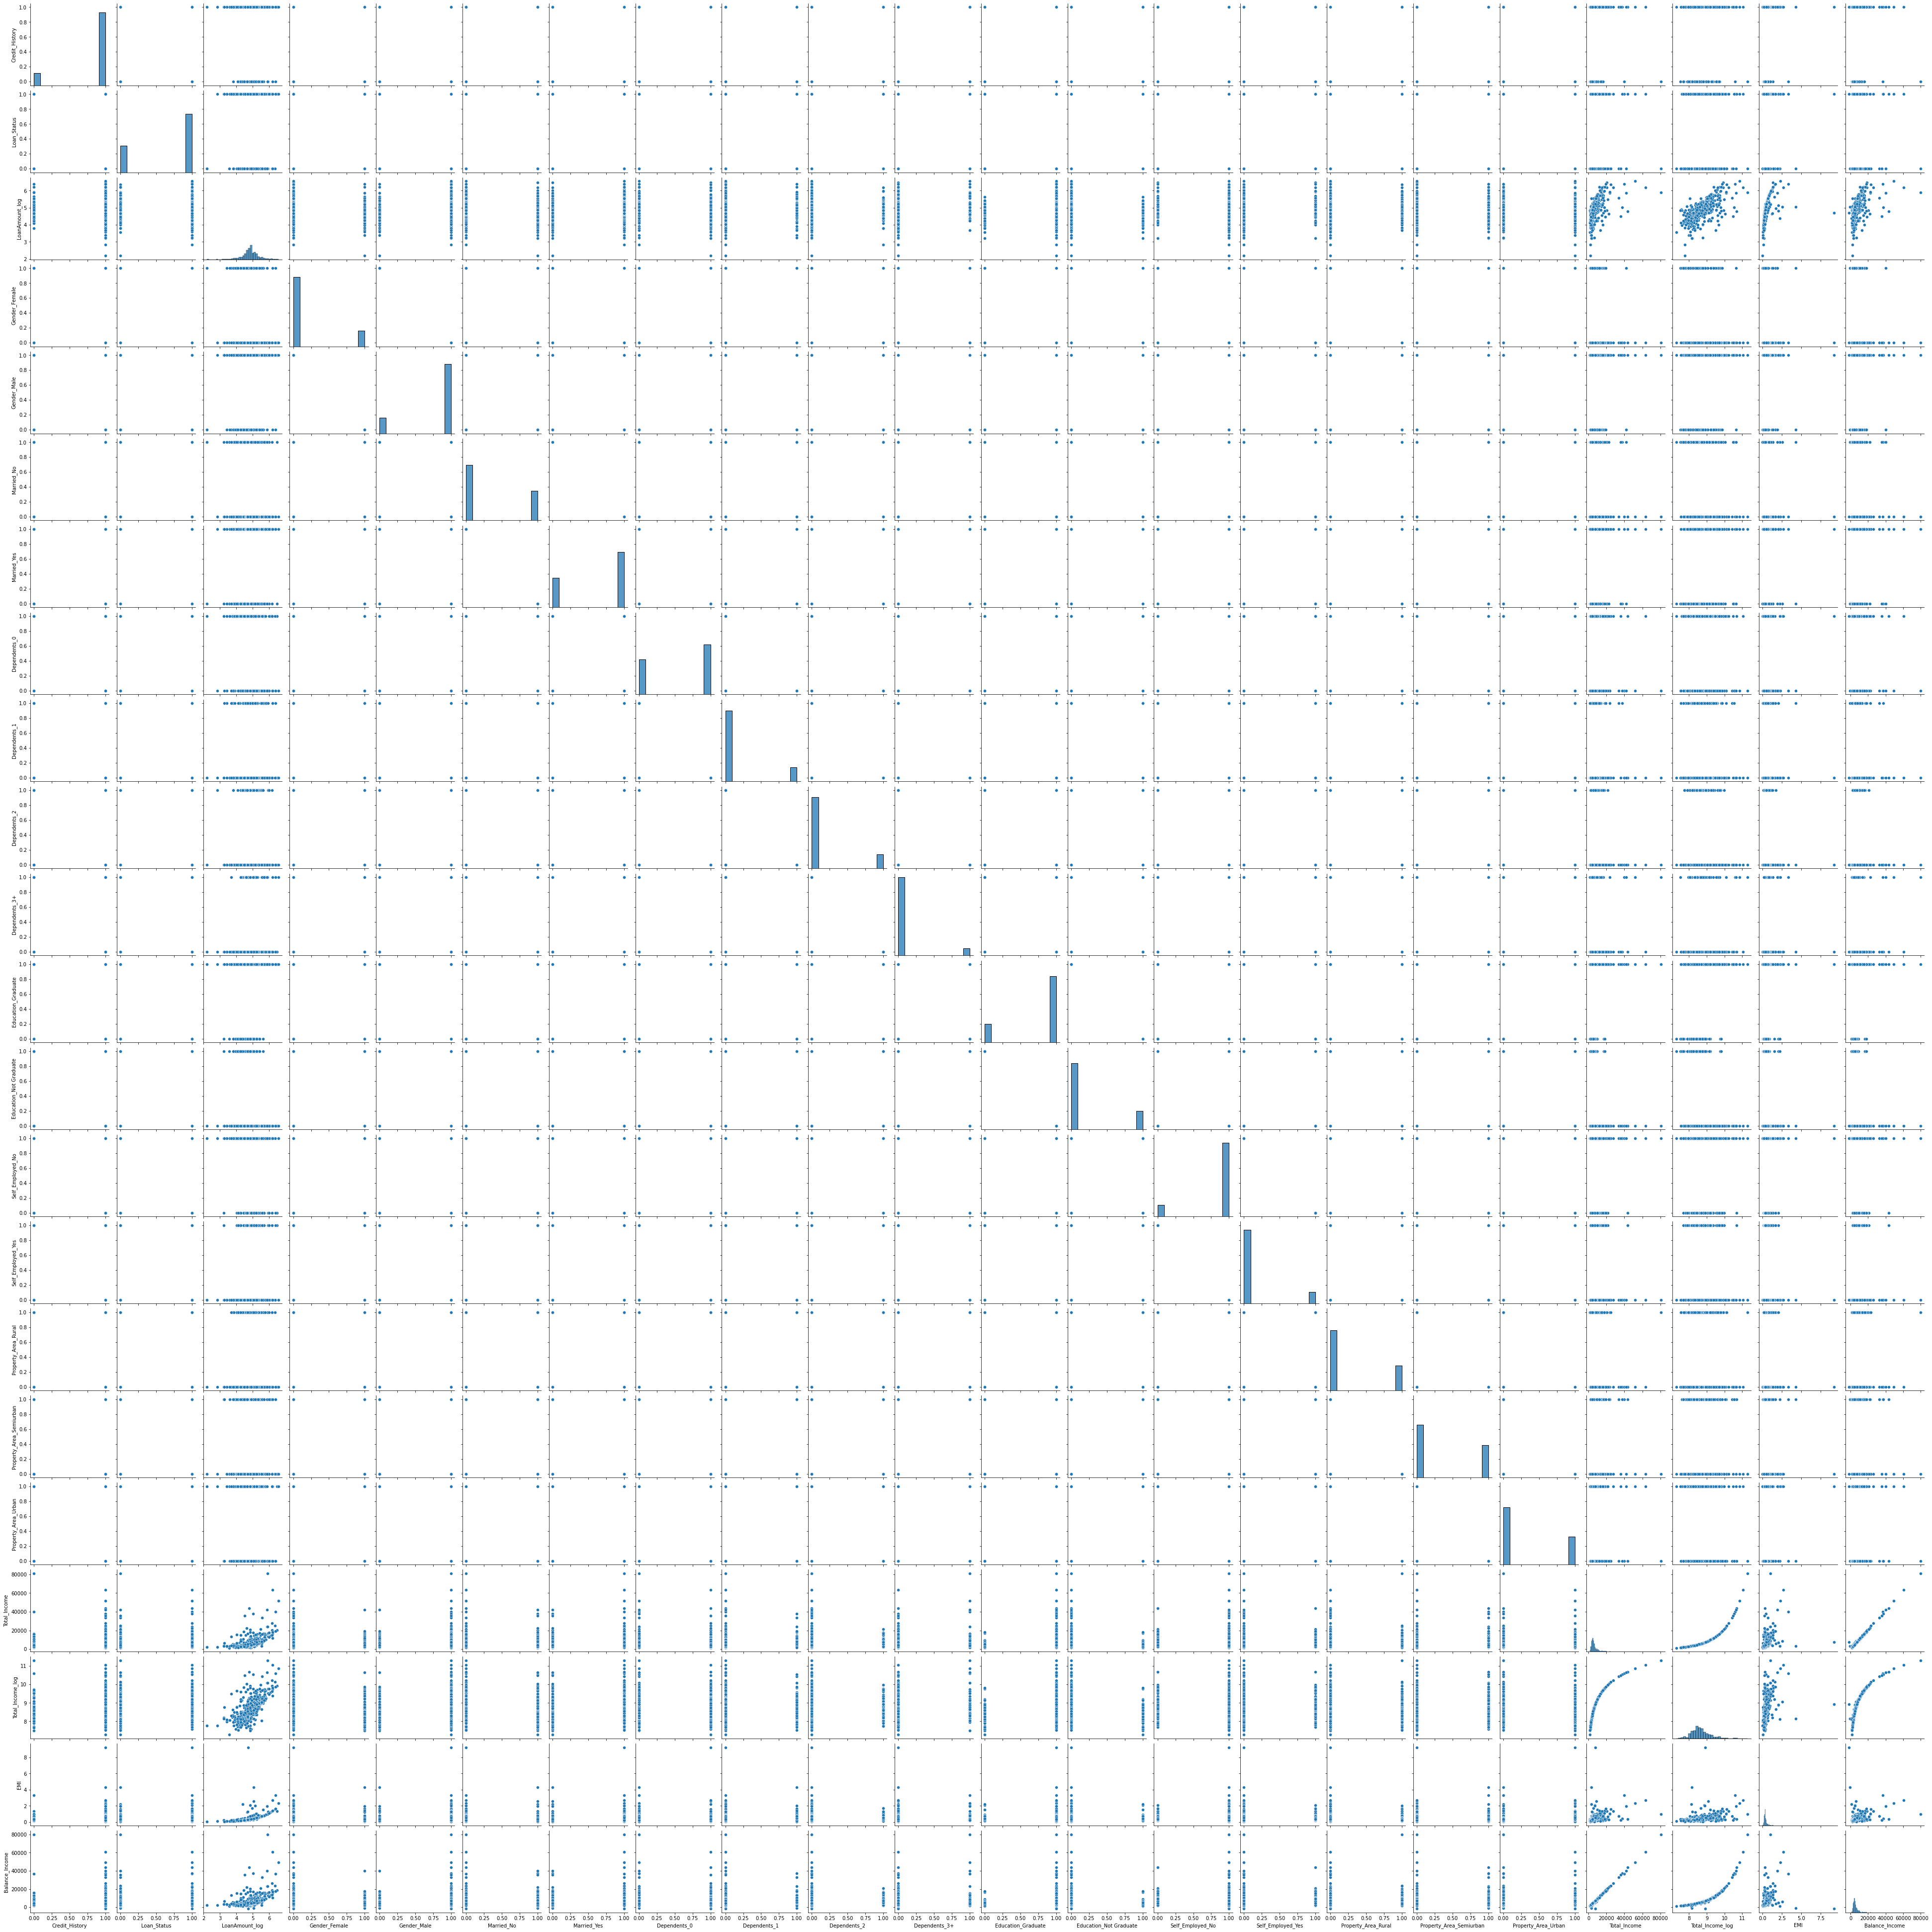

In [22]:
sns.pairplot(train)